In [16]:
import pandas as pd
import os

df = pd.read_csv("../insurance_cleaned.csv")

print(df.shape)
df.head()

(10000, 38)


,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

,PREMIUM_AMOUNT,CLAIM_AMOUNT,POSTAL_CODE,AGE,TENURE,NO_OF_FAMILY_MEMBERS,ROUTING_NUMBER,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,88.508595,16563.830000,48288.830500,44.466100,62.949800,4.488400,7.052882e+07,0.699100,0.692800,11.604000
std,48.315874,22037.489735,32467.389801,11.516827,32.890604,1.712588,3.451879e+07,0.458672,0.461356,6.877101
min,6.000000,100.000000,1001.000000,25.000000,6.000000,2.000000,1.000074e+07,0.000000,0.000000,0.000000
25%,62.015000,2000.000000,21061.000000,34.000000,34.000000,3.000000,4.071761e+07,0.000000,0.000000,6.000000
50%,88.835000,7000.000000,37206.000000,45.000000,64.000000,4.000000,7.036614e+07,1.000000,1.000000,12.000000
75%,121.902500,21000.000000,80004.000000,54.000000,92.000000,6.000000,1.000638e+08,1.000000,1.000000,18.000000
max,200.000000,100000.000000,99669.000000,64.000000,119.000000,7.000000,1.299981e+08,1.000000,1.000000,23.000000


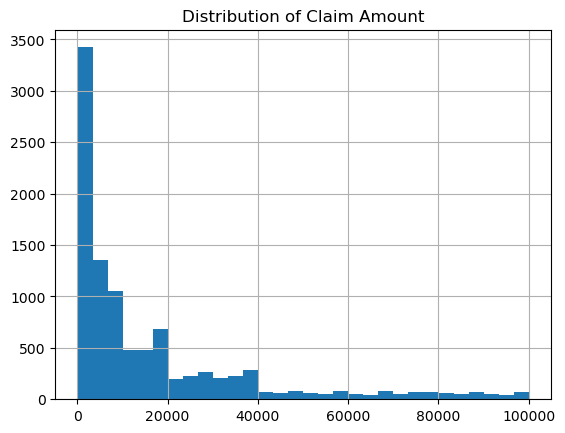

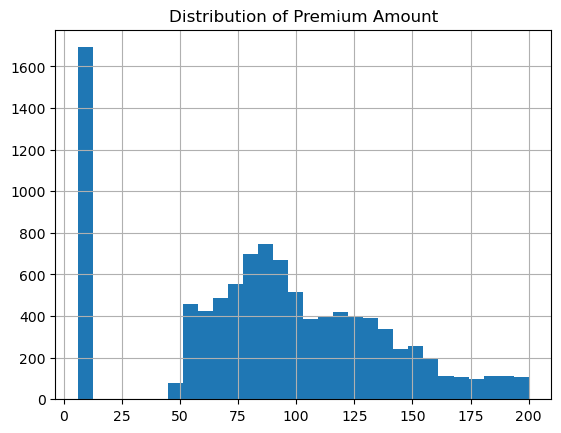

In [19]:
import matplotlib.pyplot as plt

# Numerical distributions
df['CLAIM_AMOUNT'].hist(bins=30)
plt.title("Distribution of Claim Amount")
plt.show()

df['PREMIUM_AMOUNT'].hist(bins=30)
plt.title("Distribution of Premium Amount")
plt.show()

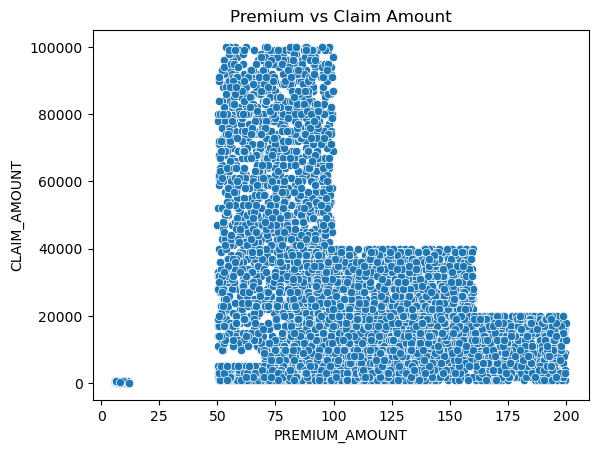

In [20]:
import seaborn as sns

sns.scatterplot(x='PREMIUM_AMOUNT', y='CLAIM_AMOUNT', data=df)
plt.title("Premium vs Claim Amount")
plt.show()

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = df.select_dtypes(include='object').columns
encoder = OneHotEncoder(handle_unknown='ignore')

encoded_df = encoder.fit_transform(df[cat_cols])
encoded_df.shape

(10000, 70248)

In [24]:
encoded_df = encoder.fit_transform(df[cat_cols])
encoded_df.shape

(10000, 70248)

In [25]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[num_cols])
scaled_data.shape

(10000, 10)